In [1]:
import pandas as pd


df2 = pd.read_excel("ny_citibikes_raw.xlsx")
df2.to_csv("ny_citibikes_raw.csv", index=False)

df = pd.read_csv('ny_citibikes_raw.csv')


# 1. Dataset Exploration

#### What information does each column contain?
Con df.info() y df.head() puedes ver la información de cada columna

- ⏱ **Start Time**: Fecha y hora de inicio del viaje  
- ⏱ **Stop Time**: Fecha y hora de fin del viaje  
- 🏁 **Start Station ID**: ID de la estación de inicio  
- 📍 **Start Station Name**: Nombre de la estación de inicio  
- 🏁 **End Station ID**: ID numérico de la estación de fin  
- 📍 **End Station Name**: Nombre de la estación de fin  
- 🚲 **Bike ID**: ID de la bicicleta  
- 👤 **User Type**: Tipo de usuario  
- 🎂 **Birth Year**: Año de nacimiento del usuario  
- 🧓 **Age**: Edad calculada del usuario  
- 🧩 **Age Groups**: Grupo de edad  
- ⏳ **Trip Duration**: Duración del viaje en segundos  
- ⏳ **Trip_Duration_in_min**: Duración del viaje en minutos  
- 📅 **Month**: Mes del viaje  
- 🍂 **Season**: Estación del año  
- 🌡 **Temperature**: Temperatura durante el viaje  
- 📆 **Weekday**: Día de la semana del viaje  



In [2]:
print('Info de todas las columnas: ')
df.info()

Info de todas las columnas: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Start Time            20400 non-null  object
 1   Stop Time             20400 non-null  object
 2   Start Station ID      20400 non-null  int64 
 3   Start Station Name    20400 non-null  object
 4   End Station ID        20400 non-null  int64 
 5   End Station Name      20399 non-null  object
 6   Bike ID               20400 non-null  int64 
 7   User Type             20400 non-null  object
 8   Birth Year            20400 non-null  int64 
 9   Age                   20400 non-null  int64 
 10  Age Groups            20400 non-null  object
 11  Trip Duration         20400 non-null  int64 
 12  Trip_Duration_in_min  20400 non-null  int64 
 13  Month                 20400 non-null  int64 
 14  Season                20400 non-null  object
 15  Tempera

####  Are there missing or duplicated values?
- Como se puede observar hay un total de 3555 datos duplicados asi que los eliminare ya que son irrelevantes para el analisis de datos para luego, tambien podemos observar que hay una columna con valores incompletos en `End Station Name`

In [3]:
print('Datos perdidos:\n', df.isna().sum())
print('Datos duplicados:', df.duplicated().sum())
df = df.drop_duplicates()
print('Datos después de ser borrados:', df.duplicated().sum())

Datos perdidos:
 Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        1
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64
Datos duplicados: 3555
Datos después de ser borrados: 0


#### What is the overall time span of the trips?


In [4]:
inicio = df['Start Time'].min()
fin = df['Start Time'].max()
print("Rango de tiempo de los viajes:", inicio, "a", fin)



Rango de tiempo de los viajes: 2017-01-01 00:38:00 a 2017-03-31 23:20:00


# 2. Basic Statistics

#### What is the average trip duration (in minutes)?
- La duración media es de 9.578272484416742 que podria redondearse a 9,58. Esto nos sirve para saber cuanto suelen durar la mayoria de los viajes y que gran parte son cortos

In [5]:
print('Duración promedio del viaje: ',df['Trip_Duration_in_min'].mean())

Duración promedio del viaje:  9.578272484416742


#### What is the minimum and maximum duration?

- La duración mínima de un viaje es de un minuto y el máximo de 6515 minutos.

In [6]:
min_duration = df['Trip_Duration_in_min'].min()
max_duration = df['Trip_Duration_in_min'].max()

print("Duración min del viaje (minutos):", min_duration)
print("Duración max del viaje (minutos):", max_duration)



Duración min del viaje (minutos): 1
Duración max del viaje (minutos): 6515


#### What are the most common start and end stations?
-  La estación más común de inicio y de fin es la misma 'Grove St Path', sin embargo tambien se puede observar que aun siendo las comun se utiliza mucho más como estación de fin. Esto tambien es útil para saber en que zonas hace más falta poner bicicletas

In [7]:
#---------INICIO----
mas_comun_num = df['Start Station Name'].value_counts().idxmax()
inicio = df['Start Station Name'].value_counts().max()

#---------FIN
menus_comun_num = df['End Station Name'].value_counts().idxmax()
fin = df['End Station Name'].value_counts().max()

print(f"Estación de inicio mas comun: {mas_comun_num} ({inicio} viajes)")
print(f"Estación de fin mas comun : {menus_comun_num} ({fin} viajes)")

Estación de inicio mas comun: Grove St PATH (2115 viajes)
Estación de fin mas comun : Grove St PATH (2743 viajes)


# 3. Users and Demographics

#### How many unique bikes were used?

-  df['Bike ID'].nunique() -> selecciono la columna del ID de la bicicleta y utilizo nunique()
 1. Nunique() -> número total de los valores
 2. Unique() -> array con todos los ID diferentes
- Hay un total de 500 bicicletas únicas

In [8]:
print('Número de bicicletas únicas: ', df['Bike ID'].nunique())

Número de bicicletas únicas:  500


#### What are the proportions of user types (Subscriber vs Customer)
- df['User Type'].value_counts() → cuenta cuántos usuarios hay de cada tipo   
-  tipo / tipo.sum() * 100 → calcula el % de cada tipo respecto al total de usuarios.  

- -> Como se puede observar hay un 98% de subscriber y un 1,86% a customer.

In [9]:
tipo = df['User Type'].value_counts()


porcentaje = tipo / tipo.sum() * 100

porcentaje

User Type
Subscriber       98.112199
One-time user     1.887801
Name: count, dtype: float64

#### What is the age distribution of the users? Which age group uses the service the most?

Como se puede observar en el rango de **35-44 años** hay **7698** por lo que es el rango de edad que más utiliza este servicio. Las personas de 35-44 años suelen poder permitirse una suscripción anual, a diferencia de muchos estudiantes. Aunque las personas mayores de 45 años también podrían pagar la suscripción, suelen realizar menos actividad física por lo que usan menos bicis

In [10]:
edades = df['Age Groups'].value_counts()
porcentaje2 = edades / edades.sum() * 100
porcentaje2

print('El grupo de edades que mas utiliza el servicio:', edades)

El grupo de edades que mas utiliza el servicio: Age Groups
35-44    7698
25-34    4002
45-54    2973
55-64    1448
65-74     615
75+        55
18-24      54
Name: count, dtype: int64


# 4. Temporal Analysis

#### How does the number of trips vary by weekday?
- df['Weekday'].value_counts() -> cuenta la cantidad de viajes que hay en total
- El número de viajes varía según el día de la semana. Como se puede observar los miercoles y jueves son los días que más se utilizan, mientras que los fines de semana tienen menos viaje. Esto podría indicar que se utilizan más para actividadaes laborales

In [11]:
# Contar cuántos viajes hay por día de la semana
viajes_por_dia = df['Weekday'].value_counts()
print(viajes_por_dia)


Weekday
Wednesday    3301
Thursday     2953
Monday       2526
Tuesday      2460
Friday       2449
Saturday     1591
Sunday       1565
Name: count, dtype: int64


#### Which month or season has the most rides?
- El mes que mas viajes se realizan es en marzo con un número de 7174. 
- En cuanto estaciones, en invierno se registran mayor cantidad de viajes. Con más de 2000 mil viajes de diferencia
- Aunque podría pensarse que en primavera habría mas viajes porque hace mejor tiempo se ve que en invierno se realizan más viajes

In [12]:
viajes_por_mes = df['Month'].value_counts()
print(viajes_por_mes)

viajes_por_estacion = df['Season'].value_counts()
print(viajes_por_estacion)

Month
3    7174
2    5052
1    4619
Name: count, dtype: int64
Season
Winter    9671
Spring    7174
Name: count, dtype: int64


#### What time of day do most trips start?
- La mayoría de los viajes comienzan durante las horas de la mañana (7–9) y la tarde (17-19 PM), coincide con los horarios para ir al trabajo y regreso a casa. Por la noche y madrugada (0–6 AM), los viajes son mucho menos frecuentes. Por lo que podría realizarse un mantenimiento de las bicicletas a esas horas

In [13]:

df['Start Time'] = pd.to_datetime(df['Start Time'])

df['Hora Viaje'] = df['Start Time'].dt.hour


viajes_por_hora = df['Hora Viaje'].value_counts().sort_index()
print(viajes_por_hora)


Hora Viaje
0      141
1       76
2       38
3       22
4       68
5      205
6      543
7     1210
8     2196
9     1017
10     601
11     544
12     713
13     719
14     664
15     729
16     889
17    1681
18    1761
19    1181
20     750
21     490
22     381
23     226
Name: count, dtype: int64


# 5 Geographic Analysis

#### Which station pairs (start → end) appear most often?
- El par de estaciones que más se repite es de Hamilton Park a Grove St Path con 401 viajes, el siguiente ya es Morris Canal a Exchange Place con 366 viajes

In [14]:
df['Pares_Estacion'] = df['Start Station Name'] + '->' + df['End Station Name'] 
pares_estacion = df['Pares_Estacion'].value_counts()
pares_estacion

Pares_Estacion
Hamilton Park->Grove St PATH           401
Morris Canal->Exchange Place           366
Dixon Mills->Grove St PATH             293
Exchange Place->Morris Canal           290
Grove St PATH->Hamilton Park           273
                                      ... 
Leonard Gordon Park->Riverview Park      1
Dey St->Warren St                        1
Manila & 1st->Lafayette Park             1
MLK Light Rail->Bethune Center           1
Morris Canal->Brunswick St               1
Name: count, Length: 1154, dtype: int64

- Are there any stations that appear only as start or only as end stations?

In [15]:

start_stations = set(df['Start Station Name'].unique())
end_stations = set(df['End Station Name'].unique())

solo_inicio = start_stations - end_stations
print("Estaciones que solo aparecen como inicio:")
print(solo_inicio)


solo_fin = end_stations - start_stations
print("\nEstaciones que solo aparecen como fin:")
print(solo_fin)


Estaciones que solo aparecen como inicio:
set()

Estaciones que solo aparecen como fin:
{nan, 'Indiana', 'E 15 St & 3 Ave', 'JCBS Depot', 'W 45 St & 8 Ave', 'Broadway & W 36 St', 'Warren St & Church St'}


# 6 Temperature and Duration

- Is there any visible relationship between temperature and trip duration?
Al observar el gráfico se puede observar que no hay una relación muy clara en cuento la duración del viaje y la temperatura.

<Axes: xlabel='Temperature', ylabel='Trip Duration'>

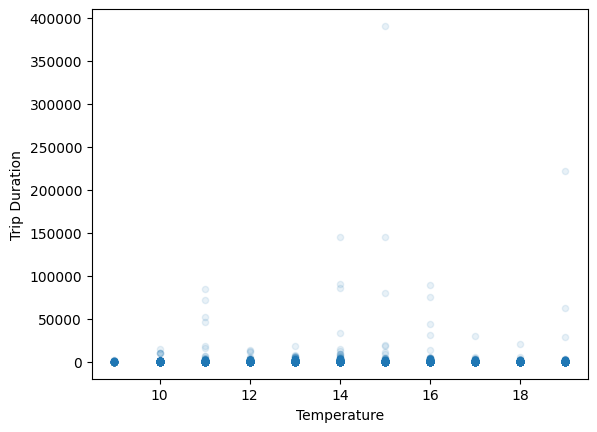

In [18]:
df.plot(kind='scatter', x='Temperature', y='Trip Duration', alpha=0.1)


-  How does average trip duration vary by season?
No hay mucha diferencia en cuanto la duración de los viajes. Aunque en primavera sean un poco más largos no hay una diferencia significativa

In [21]:
df.groupby('Season')['Trip Duration'].mean()

Season
Spring    583.219961
Winter    568.387240
Name: Trip Duration, dtype: float64

# 7. Summary and Interpretation

-  Write a short summary (5–10 lines) of your findings.
- En este Csv hay un poco más de 20.000 mil viajes (no hay muchos valores perdidos en este csv). 
- La duración media de los viajes suelen ser más cortos que largos y suelen realizarse especialmente los miércoles y jueves.
- Marzo es el mes con más desplazamientos. 
- Las horas que más se utilizan las bicicletas es alrededor de las 8 de la mañana y las 17:00-19.00 de la tarde.
- El rango de edad que más utiliza este servicio es de los 35-44 años y la gran mayoría de usuarios son 'Subscribers'. 
- Además, la estación mas utilizada es la misma tanto para el inicio como para el fin del destino 'Grove St Path', hay algunas estaciones que solo aparecen como estaciones de destino, pero no como origen.

- Mention patterns, anomalies, or interesting trends you observed.
- Viajes extremadamente largos (más de 3 días), posiblemente hay algún error en el registro o alguna bicicleta que ha sido mal devuelta
- Hay una estación que tiene como valor NAN. Aquí hay un fallo en como se guardo el destino de ese viaje (puede ser que quedo mal registrado, viaje incompleto...)
- Otro detalle que me resulto extraño es que hay estaciones que solo aparecen como fin y nunca como inicio